In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
sns.set(style= "whitegrid")

In [ ]:
#load Data
df = pd.read_csv("netflix.csv")

In [ ]:
#Data cleaning
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
# Extract numeric duration for ML
df["duration_minutes"] = df["duration"].str.extract("(\d+)").astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1158116258.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["duration_minutes"] = df["duration"].str.extract("(\d+)").astype(float)


In [ ]:
def convert_duration(x):
    x = str(x).lower()

    if "min" in x:
        return int(x.split()[0]), np.nan      # (minutes, seasons)
    if "season" in x:
        return np.nan, int(x.split()[0])      # (minutes, seasons)
    return np.nan, np.nan


In [ ]:
#Create new numeric columns
df["duration_minutes"], df["seasons"] = zip(*df["duration"].apply(convert_duration))


In [ ]:
# Fill numeric medians
df["duration_minutes"].fillna(df["duration_minutes"].median(), inplace=True)
df["seasons"].fillna(df["seasons"].median(), inplace=True)


In [ ]:
#Fill release year
df["release_year"].fillna(df["release_year"].median(), inplace=True)

/tmp/ipython-input-2014246927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["release_year"].fillna(df["release_year"].median(), inplace=True)


In [ ]:
# Encode Type → Movie = 0, TV Show = 1
df["type_label"] = (df["type"] == "TV Show").astype(int)

/tmp/ipython-input-146855930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2",legend=False)


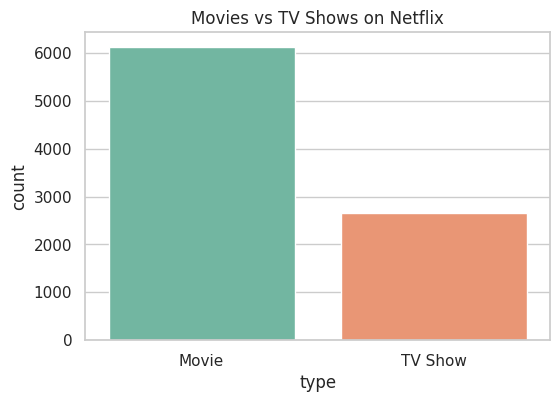

In [ ]:
#Visualization
#Movies vs TV Shows Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2",legend=False)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


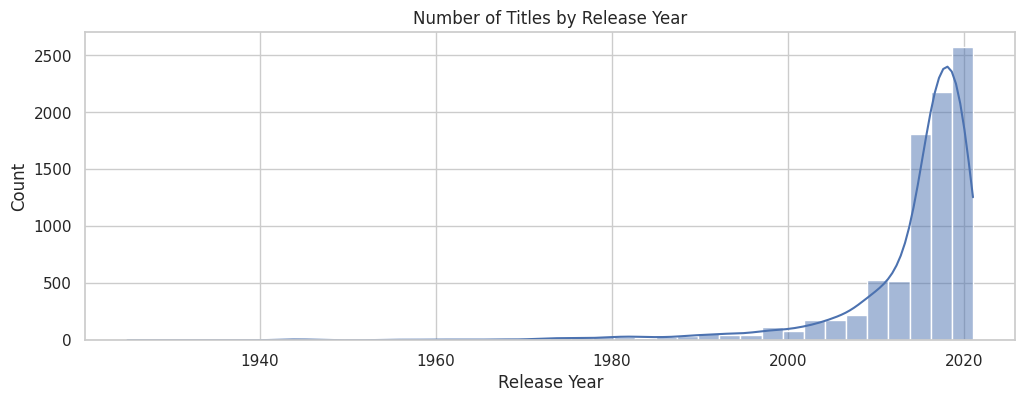

In [ ]:
#Titles Released Per Year
plt.figure(figsize=(12,4))
sns.histplot(df["release_year"], bins=40, kde=True)
plt.title("Number of Titles by Release Year")
plt.xlabel("Release Year")
plt.show()

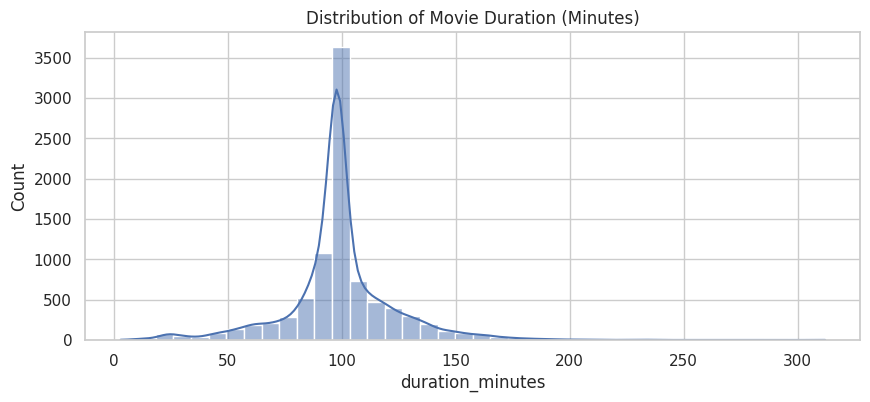

In [ ]:
#Duration Distribution (Movies)
plt.figure(figsize=(10,4))
sns.histplot(df["duration_minutes"].dropna(), bins=40, kde=True)
plt.title("Distribution of Movie Duration (Minutes)")
plt.show()

In [ ]:
#WordCloud from Description
text = " ".join(df["listed_in"].astype(str))
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(text)


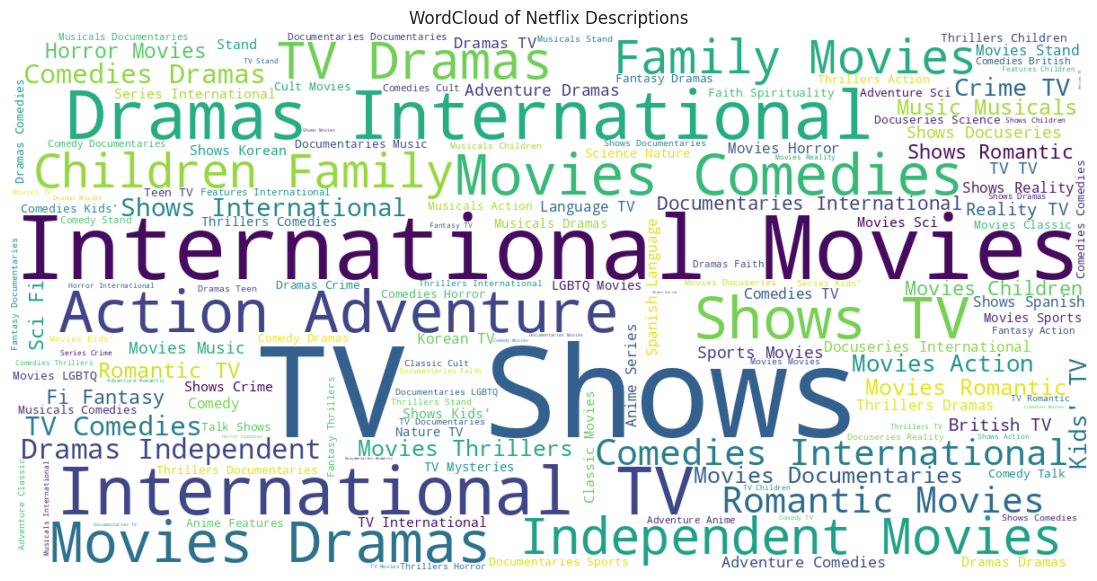

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Netflix Descriptions")
plt.show()


In [ ]:
# ML Features — keep it simple
X = df[["release_year", "duration_minutes"]]
y = df["type_label"]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy
print("\nMODEL ACCURACY:", accuracy_score(y_test, y_pred))


MODEL ACCURACY: 0.9880546075085325


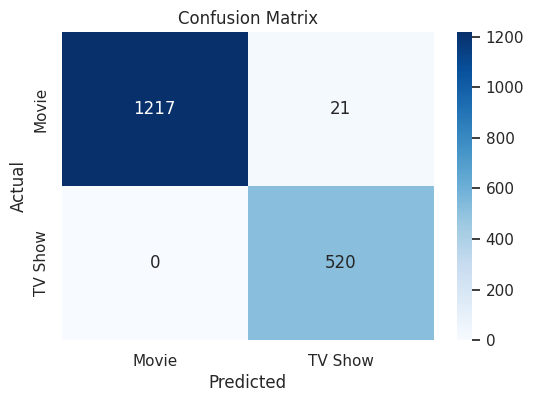

In [ ]:
#CONFUSION MATRIX PLOT
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Movie","TV Show"],
            yticklabels=["Movie","TV Show"],
            cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print(comparison_df.head(20))


    Actual  Predicted
0        0          0
1        1          1
2        1          1
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       1          1
12       1          1
13       1          1
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       1          1
